## Download DarkNet and set up parameter

- GPU=1 調用 GPU CUDA
- CUDNN=1 調用 cuDNN v5-v7 加速訓練
- CUDNN_HALF=1 調用 Tensor Cores (適用於 Titan V / Tesla V100 / DGX-2 and later) 偵測加速 3 倍, 訓練加速 2 倍
- OPENCV=1 調用 OpenCV 3.x/2.4.x - 用於攝影機偵測用

In [1]:
import cv2
print(cv2.__version__)

4.5.2


In [2]:
! git clone https://github.com/AlexeyAB/darknet.git

! sed -i "s/GPU=0/GPU=1/g" darknet/Makefile
! sed -i "s/CUDNN=0/CUDNN=1/g" darknet/Makefile
! sed -i "s/OPENCV=0/OPENCV=1/g" darknet/Makefile

! head darknet/Makefile

! cd darknet; make 

fatal: destination path 'darknet' already exists and is not an empty directory.
GPU=1
CUDNN=1
CUDNN_HALF=1
OPENCV=1
AVX=0
OPENMP=1
LIBSO=1
ZED_CAMERA=0
ZED_CAMERA_v2_8=0

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -fopenmp -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int

## Use YOLO-V4

In [3]:
! cd darknet ; ./darknet 

! gdown https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights -q

! ls darknet/data


usage: ./darknet <function>
9k.tree     eagle.jpg	 imagenet.labels.list	   person.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  scream.jpg
coco.names  goal.txt	 labels			   voc.names
dog.jpg     horses.jpg	 openimages.names


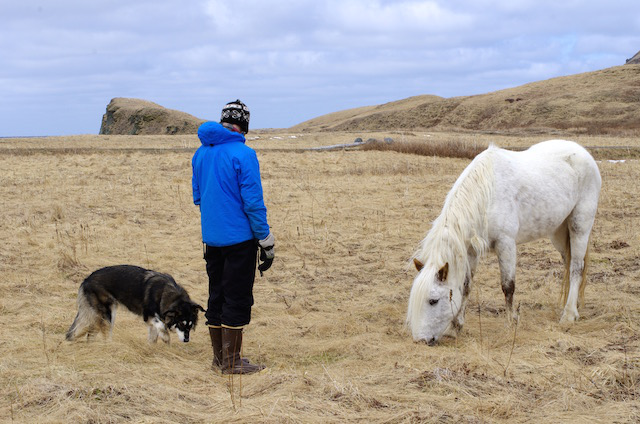

In [4]:
from PIL import Image
Image.open('darknet/data/person.jpg')

In [5]:
! cd darknet; ./darknet detect cfg/yolov4.cfg  /home/f64081169/Desktop/demo/yolov4.weights /home/f64081169/Desktop/demo/darknet/data/person.jpg

 CUDA-version: 10020 (10020), cuDNN: 8.2.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.1.1
 0 : compute_capability = 530, cudnn_half = 0, GPU: NVIDIA Tegra X1 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 

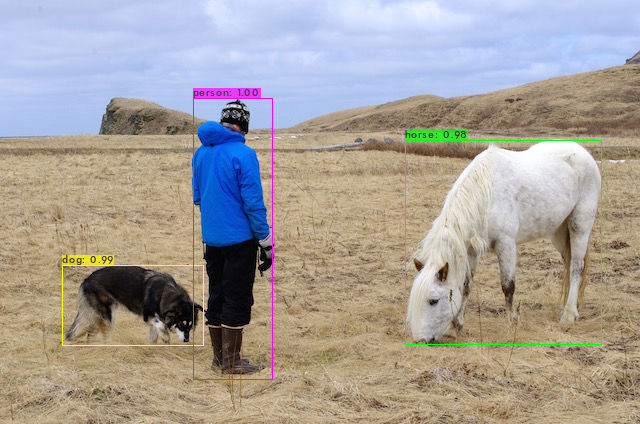

In [6]:
from PIL import Image
Image.open('darknet/predictions.jpg')

## DarkNet to ONNX

In [16]:
! cd ../
! sudo apt-get install protobuf-compiler libprotoc-dev
!  pip3 install onnx
! git clone https://github.com/Tianxiaomo/pytorch-YOLOv4.git
! pip install onnxruntime


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libprotoc-dev is already the newest version (3.0.0-9.1ubuntu1).
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following packages were automatically installed and are no longer required:
  apt-clone archdetect-deb bogl-bterm busybox-static cryptsetup-bin
  dpkg-repack gir1.2-timezonemap-1.0 gir1.2-xkl-1.0 grub-common
  kde-window-manager kinit kio kpackagetool5 kwayland-data kwin-common
  kwin-data kwin-x11 libdebian-installer4 libkdecorations2-5v5
  libkdecorations2private5v5 libkf5activities5 libkf5attica5
  libkf5completion-data libkf5completion5 libkf5declarative-data
  libkf5declarative5 libkf5doctools5 libkf5globalaccel-data libkf5globalaccel5
  libkf5globalaccelprivate5 libkf5idletime5 libkf5jobwidgets-data
  libkf5jobwidgets5 libkf5kcmutils-data libkf5kcmutils5 libkf5kiocore5
  libkf5kiontlm5 libkf5kiowidgets5 libkf5newstuff-data libkf5newstuff5
  libkf5newst

In [17]:

! python3 /home/f64081169/Desktop/demo/pytorch-YOLOv4/demo_darknet2onnx.py /home/f64081169/Desktop/demo/pytorch-YOLOv4/cfg/yolov4-tiny.cfg /home/f64081169/Desktop/demo/pytorch-YOLOv4/data/coco.names /home/f64081169/Desktop/demo/yolov4-tiny.weights /home/f64081169/Desktop/demo/pytorch-YOLOv4/data/dog.jpg 8

## ONNX to tensorRT

In [19]:
! /usr/src/tensorrt/bin/trtexec --onnx=yolov4_1_3_416_416_static.onnx --explicitBatch --saveEngine=yolov4.trt --workspace=4096 --fp16

&&&& RUNNING TensorRT.trtexec [TensorRT v8201] # /usr/src/tensorrt/bin/trtexec --onnx=yolov4_1_3_416_416_static.onnx --explicitBatch --saveEngine=yolov4.trt --workspace=4096 --fp16
[04/24/2022-19:39:32] [W] --explicitBatch flag has been deprecated and has no effect!
[04/24/2022-19:39:32] [W] Explicit batch dim is automatically enabled if input model is ONNX or if dynamic shapes are provided when the engine is built.
[04/24/2022-19:39:32] [I] === Model Options ===
[04/24/2022-19:39:32] [I] Format: ONNX
[04/24/2022-19:39:32] [I] Model: yolov4_1_3_416_416_static.onnx
[04/24/2022-19:39:32] [I] Output:
[04/24/2022-19:39:32] [I] === Build Options ===
[04/24/2022-19:39:32] [I] Max batch: explicit batch
[04/24/2022-19:39:32] [I] Workspace: 4096 MiB
[04/24/2022-19:39:32] [I] minTiming: 1
[04/24/2022-19:39:32] [I] avgTiming: 8
[04/24/2022-19:39:32] [I] Precision: FP32+FP16
[04/24/2022-19:39:32] [I] Calibration: 
[04/24/2022-19:39:32] [I] Refit: Disabled
[04/24/2022-19:39:32] [I] Sparsity: Disabl

In [24]:

! python3 pytorch-YOLOv4/demo_trt.py yolov4.trt /home/f64081169/Desktop/demo/pytorch-YOLOv4/data/dog.jpg 416 416


@article{yolov4,
  title={YOLOv4: YOLOv4: Optimal Speed and Accuracy of Object Detection},
  author={Alexey Bochkovskiy, Chien-Yao Wang, Hong-Yuan Mark Liao},
  journal = {arXiv},
  year={2020}
}

# Test nvprof for GPU performance tracing

In [21]:
!/usr/local/cuda-10.2/bin/cuda-install-samples-10.2.sh .

Copying samples to ./NVIDIA_CUDA-10.2_Samples now...
Finished copying samples.


In [33]:
! sudo /usr/local/cuda-10.2/bin/nvprof  pytorch-YOLOv4/demo_trt.py yolov4.trt /home/f64081169/Desktop/demo/pytorch-YOLOv4/data/dog.jpg 416 416

======== Error: Application returned non-zero code -1


In [34]:
! sudo /usr/local/cuda-10.2/bin/nvprof --print-gpu-trace python3 pytorch-YOLOv4/demo_trt.py yolov4.trt /home/f64081169/Desktop/demo/pytorch-YOLOv4/data/dog.jpg 416 416

======== Warning: The path to cupti library might not be set in LD_LIBRARY_PATH. By default, it is installed in /usr/local/<cuda-toolkit>/extras/CUPTI/lib64 or /usr/local/<cuda-toolkit>/targets/<arch>/lib.======== Warning: No CUDA application was profiled, exiting
======== Error: Application received signal 132
